In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from zipfile import ZipFile

Open .zip files from Citibike and combine into single .csv

In [16]:
source = '/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/data/'

for item in os.listdir(source):
    if item.endswith('.zip'):
        file_name = source + item
        zip_ref = ZipFile(file_name)
        zip_ref.extractall(source)
        os.remove(file_name)
        zip_ref.close()

Create lists of monthly .csv files to combine 

In [17]:
os.chdir(source)

In [21]:
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]

len(all_files)

12

In [22]:
bike_file = pd.concat([pd.read_csv(f) for f in all_files])
bike_file.to_csv('bike_trips_20.csv', index=False, encoding='utf-8-sig')

Load .csv as Pandas DataFrame

In [24]:
bike_trips = pd.read_csv('/Users/jonleckie/Desktop/DSI_all/capstones/capstone_one/data/bike_trips_20.csv')

In [25]:
bike_trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


In [26]:
bike_trips.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
19506852,1587,2020-01-31 23:59:26.8820,2020-02-01 00:25:54.4890,3244,University Pl & E 8 St,40.731437,-73.994903,3092,Berry St & N 8 St,40.719009,-73.958525,40662,Subscriber,1990,1
19506853,222,2020-01-31 23:59:32.6410,2020-02-01 00:03:15.4720,383,Greenwich Ave & Charles St,40.735238,-74.000271,383,Greenwich Ave & Charles St,40.735238,-74.000271,28722,Subscriber,1983,1
19506854,163,2020-01-31 23:59:39.1780,2020-02-01 00:02:23.0400,150,E 2 St & Avenue C,40.720874,-73.980858,411,E 6 St & Avenue D,40.722281,-73.976687,32530,Subscriber,1958,2
19506855,327,2020-01-31 23:59:49.2310,2020-02-01 00:05:16.3790,483,E 12 St & 3 Ave,40.732233,-73.988900,3718,E 11 St & Avenue B,40.727464,-73.979504,15314,Customer,1994,1
19506856,484,2020-01-31 23:59:57.0360,2020-02-01 00:08:01.1820,327,Vesey Pl & River Terrace,40.715338,-74.016584,534,Water - Whitehall Plaza,40.702551,-74.012723,30947,Subscriber,1987,1


In [28]:
bike_trips.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19506857 entries, 0 to 19506856
Data columns (total 15 columns):
 #   Column                   Non-Null Count     Dtype  
---  ------                   --------------     -----  
 0   tripduration             19506857 non-null  int64  
 1   starttime                19506857 non-null  object 
 2   stoptime                 19506857 non-null  object 
 3   start station id         19506857 non-null  int64  
 4   start station name       19506857 non-null  object 
 5   start station latitude   19506857 non-null  float64
 6   start station longitude  19506857 non-null  float64
 7   end station id           19506857 non-null  int64  
 8   end station name         19506857 non-null  object 
 9   end station latitude     19506857 non-null  float64
 10  end station longitude    19506857 non-null  float64
 11  bikeid                   19506857 non-null  int64  
 12  usertype                 19506857 non-null  object 
 13  birth year               

In [29]:
bike_trips['starttime'] = pd.to_datetime(bike_trips['starttime'])
bike_trips['stoptime'] = pd.to_datetime(bike_trips['stoptime'])

In [30]:
bike_trips['day_start'] = bike_trips['starttime'].dt.day
bike_trips['month_start'] = bike_trips['starttime'].dt.month
bike_trips['wk_day_start'] = bike_trips['starttime'].dt.dayofweek

In [31]:
bike_trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,day_start,month_start,wk_day_start
0,1062,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,1,6,0
1,3810,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,1,6,0
2,1017,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,1,6,0
3,226,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,1,6,0
4,1437,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,1,6,0


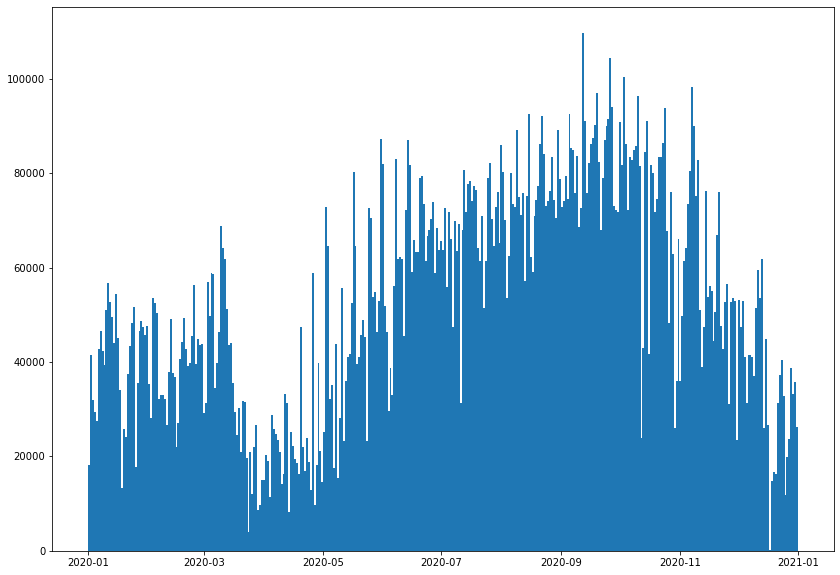

In [37]:
fig, ax = plt.subplots(figsize=(14,10))

ax.hist(bike_trips['starttime'], bins=365);